In [1]:
import os
import pandas as pd
from scipy import stats
import notebook as nb
%matplotlib inline


os.chdir("../")

df = pd.read_csv("csv/ヨルシカ_20231119.csv")

# 単語の一致率（YouTube)

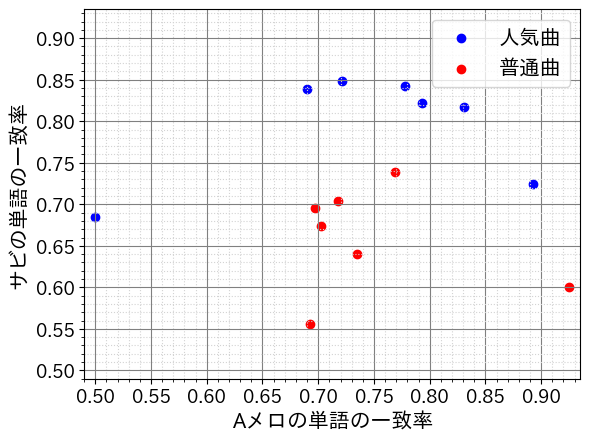

In [2]:
rates_wmr, xy_min_wmr, xy_max_wmr = nb.preprocess(df, "csv/ヨルシカ_wmr_20231119.csv")
nb.scatter(rates_wmr, xy_min_wmr, xy_max_wmr, nb.YOUTUBE, "Aメロの単語の一致率", "サビの単語の一致率", "images/ヨルシカにおける単語の一致率と人気度の関係（YouTube）.svg")

## t検定(サビ，軸回転なし)
- 帰無仮説：サビの単語の一致率の平均は等しい
- 有意水準：0.05

In [3]:
sorted_rates_wmr = nb.preparing_ttest(rates_wmr, nb.YOUTUBE)
stats.ttest_ind(sorted_rates_wmr["pop"][nb.RATE_S], sorted_rates_wmr["unpop"][nb.RATE_S], equal_var=False)

TtestResult(statistic=4.0188222961875155, pvalue=0.0017039757210476991, df=11.99668825141184)

# 単語の一致率（Spotify)

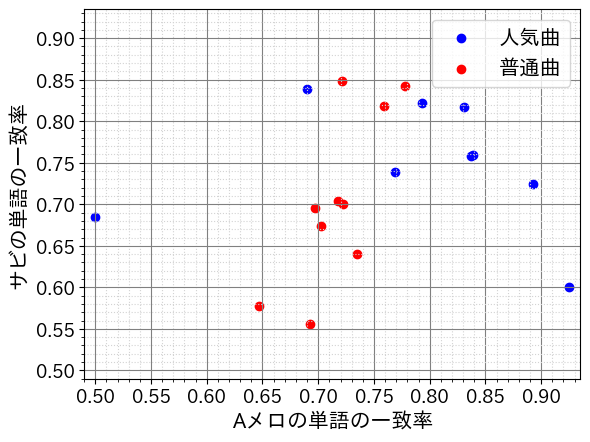

In [4]:
nb.scatter(rates_wmr, xy_min_wmr, xy_max_wmr, nb.SPOTIFY, "Aメロの単語の一致率", "サビの単語の一致率", "images/ヨルシカにおける単語の一致率と人気度の関係（Spotify）.svg")

## t検定(サビ，軸回転なし)
- 帰無仮説：サビの単語の一致率の平均は等しい
- 有意水準：0.05

In [5]:
sorted_rates_wmr = nb.preparing_ttest(rates_wmr, nb.SPOTIFY)
stats.ttest_ind(sorted_rates_wmr["pop"][nb.RATE_S], sorted_rates_wmr["unpop"][nb.RATE_S], equal_var=False)

TtestResult(statistic=1.0604100417130604, pvalue=0.30437724443409125, df=16.34472895192207)

# 木構造の類似度計算（Youtube）

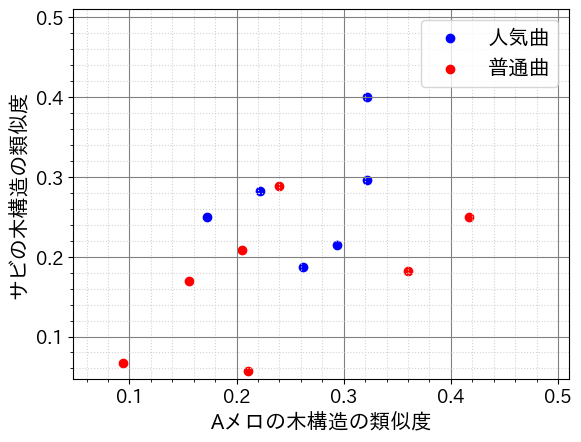

In [6]:
rates_ts, xy_min_tspc, xy_max_tspc = nb.preprocess(df, "csv/ヨルシカ_tspc_20231119.csv")
nb.scatter(rates_ts, xy_min_tspc, xy_max_tspc, nb.YOUTUBE, "Aメロの木構造の類似度", "サビの木構造の類似度", "images/ヨルシカにおける木構造の類似度と人気度の関係（YouTube）.svg")

## t検定(サビ，軸回転無し)
- 帰無仮説：サビの単語の一致率の平均は等しい
- 有意水準：0.05

In [7]:
sorted_rates_ts = nb.preparing_ttest(rates_ts, nb.YOUTUBE)
stats.ttest_ind(sorted_rates_ts["pop"][nb.RATE_S], sorted_rates_ts["unpop"][nb.RATE_S], equal_var=False)

TtestResult(statistic=2.1587872319901074, pvalue=0.05382507961840301, df=10.996656143625671)

# 木構造の類似度（Spotify）

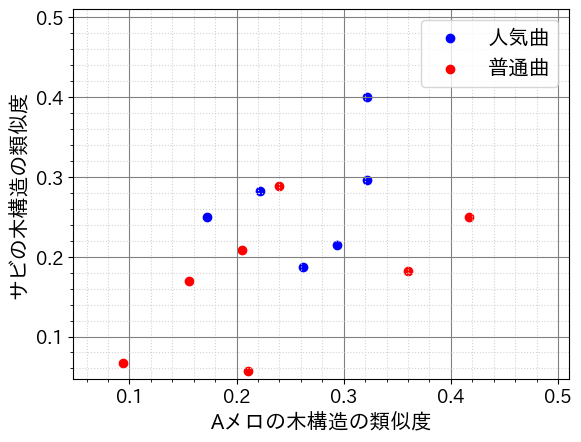

In [8]:
nb.scatter(rates_ts, xy_min_tspc, xy_max_tspc, nb.YOUTUBE, "Aメロの木構造の類似度", "サビの木構造の類似度", "images/ヨルシカにおける木構造の類似度と人気度の関係（Spotify）.svg")

## t検定(サビ，軸回転無し)
- 帰無仮説：サビの単語の一致率の平均は等しい
- 有意水準：0.05

In [9]:
sorted_rates_ts = nb.preparing_ttest(rates_ts, nb.SPOTIFY)
stats.ttest_ind(sorted_rates_ts["pop"][nb.RATE_S], sorted_rates_ts["unpop"][nb.RATE_S], equal_var=False)

TtestResult(statistic=0.6481327790275425, pvalue=0.5295567932061432, df=11.565294766949117)

# head2, tail2（YouTube）単語の一致率

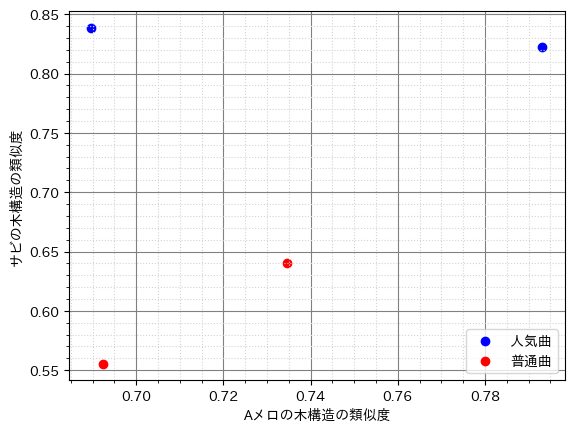

In [10]:
nb.head_tail(rates_wmr, nb.YOUTUBE, "Aメロの木構造の類似度", "サビの木構造の類似度")

# head2, tail2 （Spotify）単語の一致率

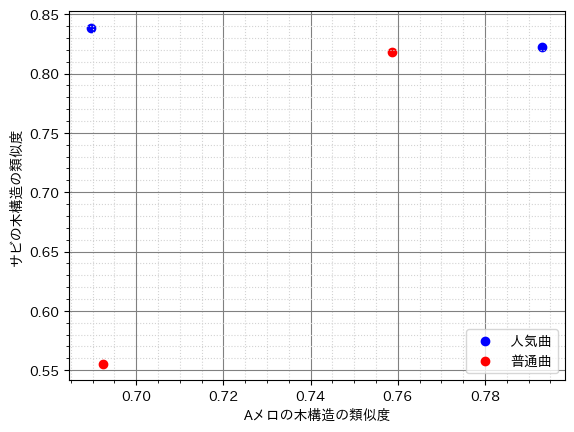

In [11]:
nb.head_tail(rates_wmr, nb.SPOTIFY, "Aメロの木構造の類似度", "サビの木構造の類似度")

# head2, tail2（YouTube）木の類似度

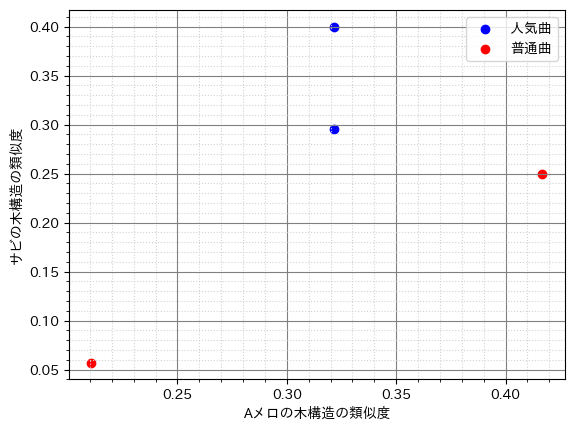

In [12]:
nb.head_tail(rates_ts, nb.YOUTUBE, "Aメロの木構造の類似度", "サビの木構造の類似度")

# head2, tail2 （Spotify）木の類似度

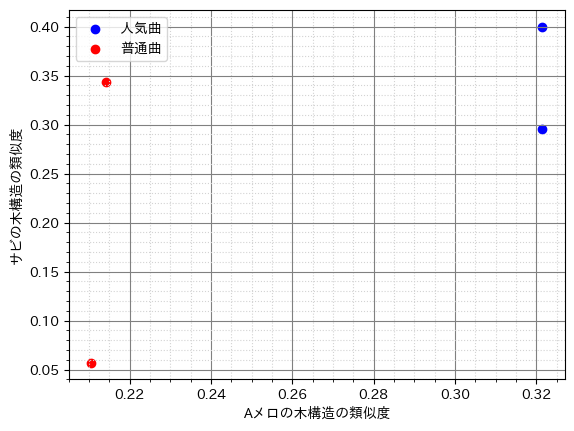

In [13]:
nb.head_tail(rates_ts, nb.SPOTIFY, "Aメロの木構造の類似度", "サビの木構造の類似度")